# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
#TODO Do samodzielnej implementacji

import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

A_invert = np.array([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[-3,  3,  0,  0, -2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[2, -2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0, -3,  3,  0,  0, -2, -1,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  2, -2,  0,  0,  1,  1,  0,  0],
[-3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0,  0,  0,  0,  0],
[0,  0,  0,  0, -3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0],
[9, -9, -9,  9,  6,  3, -6, -3,  6, -6,  3, -3,  4,  2,  2,  1],
[-6,  6,  6, -6, -3, -3,  3,  3, -4,  4, -2,  2, -2, -2, -1, -1],
[2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0],
[-6,  6,  6, -6, -4, -2,  4,  2, -3,  3, -3,  3, -2, -1, -2, -1],
[4, -4, -4,  4,  2,  2, -2, -2,  2, -2,  2, -2,  1,  1,  1,  1],
])

In [7]:
def interpolate_cubic(img, ver, hor):
    x, y = img.shape
    x_w = int(np.round(x * ver))
    y_w = int(np.round( y * hor))

    new_img = np.zeros((x_w, y_w))

    for i in range(1, x_w - 3):
        for j in range(1, y_w - 3):
            i_w = i/ver
            j_w = j/hor

            i1 = int(np.floor(i/ver))
            i2 = int(np.floor(i/ver + 1))
            j1 = int(np.floor(j/hor))
            j2 = int(np.floor(j/hor + 1))

            if np.floor(i_w) + 1 >= x: i2 = x - 1
            if np.floor(j_w) + 1 >= y: j2 = y - 1

            if i1 == i2: i1 -= 1
            if j1 == j2: j1 -= 1

            if i_w > x - 1: i_w -= 1
            if j_w > y - 1: j_w -= 1

            A = img[i1, j1]
            B = img[i1, j2]
            C = img[i2, j1]
            D = img[i2, j2]

            Ax = (img[i1 + 1, j1] - img[i1 - 1, j1]) / 2
            Ay = (img[i1, j1 + 1] - img[i1, j1 - 1]) / 2
            Axy = (img[i1 + 1, j1 + 1] - img[i1 - 1, j1] - img[i1, j1 - 1] + img[i1, j1]) / 4
            
            Bx = (img[i1 + 1, j2] - img[i1 - 1, j2]) / 2
            By = (img[i1, j2 + 1] - img[i1, j2 - 1]) / 2
            Bxy = (img[i1 + 1, j2 + 1] - img[i1 - 1, j2] - img[i1, j2 - 1] + img[i1, j2]) / 4
            
            Dx = (img[i2 + 1, j1] - img[i2 - 1, j1]) / 2
            Dy = (img[i2, j1 + 1] - img[i2, j1 - 1]) / 2
            Dxy = (img[i2 + 1,j1 + 1] - img[i2 - 1, j1] - img[i2, j1 - 1] + img[i2, j1]) / 4
            
            Cx = (img[i2 + 1, j2] - img[i2 - 1, j2]) / 2
            Cy = (img[i2, j2 + 1] - img[i2, j2 - 1]) / 2
            Cxy = (img[i2 + 1, j2 + 1] - img[i2 - 1, j2] - img[i2, j2 - 1] + img[i2, j2]) / 4

            x = [A, B, D, C, Ax, Bx, Dx, Cx, Ay, By, Dy, Cy, Axy, Bxy, Dxy, Cxy]
            
            x = np.reshape(x, (len(x), 1))
            
            a = np.dot(A_invert, x)
            
            a_re = np.reshape(a, (4, 4))
            
            
            for r_i in range(4):
                for c_i in range(4):
                    new_img[i, j] += a_re[r_i, c_i] * (i**r_i) * (j**c_i)
    return new_img

In [10]:
def inter_cubic(img,pion,poziom):
    (X, Y) = img.shape
    X_w = np.int(np.round(pion*X))
    Y_w = np.int(np.round(poziom*Y))
    new_img=np.zeros((X_w, Y_w))
    for i in range(1,X_w-3):
        for j in range(1,Y_w-3):
            i_w=i/pion
            j_w=j/poziom
            
            i1 = np.int(np.floor(i_w))
            i2 = np.int(np.floor(i_w)+1)
            j1 = np.int(np.floor(j_w))
            j2 = np.int(np.floor(j_w)+1)
            
            
            #zabezpieczenia
            if np.floor(i_w)+1>=X:
                i2=X-1
            if np.floor(j_w)+1>=Y:
                j2=Y-1
                
            # Na wypadek wartości w rogach
            if i1==i2: i1=i1-1
            if j1==j2: j1=j1-1
            if i_w>X-1: i_w-=1
            if j_w>X-1: j_w-=1

            A=img[i1,j1]
            B=img[i1,j2]
            C=img[i2,j1]
            D=img[i2,j2]
                
            Ax=(img[i1+1,j1]-img[i1-1,j1])/2
            Ay=(img[i1,j1+1]-img[i1,j1-1])/2
            Axy=(img[i1+1,j1+1]-img[i1-1,j1]-img[i1,j1-1]+img[i1,j1])/4
            
            Bx=(img[i1+1,j2]-img[i1-1,j2])/2
            By=(img[i1,j2+1]-img[i1,j2-1])/2
            Bxy=(img[i1+1,j2+1]-img[i1-1,j2]-img[i1,j2-1]+img[i1,j2])/4
            
            Dx=(img[i2+1,j1]-img[i2-1,j1])/2
            Dy=(img[i2,j1+1]-img[i2,j1-1])/2
            Dxy=(img[i2+1,j1+1]-img[i2-1,j1]-img[i2,j1-1]+img[i2,j1])/4
            
            Cx=(img[i2+1,j2]-img[i2-1,j2])/2
            Cy=(img[i2,j2+1]-img[i2,j2-1])/2
            Cxy=(img[i2+1,j2+1]-img[i2-1,j2]-img[i2,j2-1]+img[i2,j2])/4

            x= [A,B,D,C,Ax,Bx,Dx,Cx,Ay,By,Dy,Cy,Axy,Bxy,Dxy,Cxy]
            
            x=np.reshape(x,(len(x),1))
            
            a = np.dot(A_invert,x)
            
            a_re=np.reshape(a, (4, 4))
            
            
            for r_i in range(4):
                for c_i in range(4):
                    new_img[i,j]+=a_re[r_i,c_i]*(i**r_i)*(j**c_i)
    return new_img

/tmp/ipykernel_9284/4260236443.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_w = np.int(np.round(pion*X))
/tmp/ipykernel_9284/4260236443.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for m

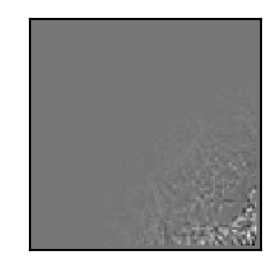

In [11]:
parrot = cv2.imread('parrot.bmp')
parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY)

parrot_2 = inter_cubic(parrot, 1.5, 1.5)

plt.figure(figsize=(parrot_2.shape[0]/100, parrot_2.shape[1]/100), dpi=200)
plt.imshow(parrot_2, cmap ="gray")
plt.xticks([]), plt.yticks([])
plt.show()